In [3]:
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
data = pd.read_csv("/content/Sales Dataset.csv")

In [5]:
data.head()

,Order ID,Amount,Profit,Quantity,Category,Sub-Category,PaymentMode,Order Date,CustomerName,State,City,Year-Month
0,B-26776,9726,1275,5,Electronics,Electronic Games,UPI,2023-06-27,David Padilla,Florida,Miami,2023-06
1,B-26776,9726,1275,5,Electronics,Electronic Games,UPI,2024-12-27,Connor Morgan,Illinois,Chicago,2024-12
2,B-26776,9726,1275,5,Electronics,Electronic Games,UPI,2021-07-25,Robert Stone,New York,Buffalo,2021-07
3,B-26776,4975,1330,14,Electronics,Printers,UPI,2023-06-27,David Padilla,Florida,Miami,2023-06
4,B-26776,4975,1330,14,Electronics,Printers,UPI,2024-12-27,Connor Morgan,Illinois,Chicago,2024-12


In [6]:
data['Year'] = data['Year-Month'].str.slice(0, 4)
data.head()

,Order ID,Amount,Profit,Quantity,Category,Sub-Category,PaymentMode,Order Date,CustomerName,State,City,Year-Month,Year
0,B-26776,9726,1275,5,Electronics,Electronic Games,UPI,2023-06-27,David Padilla,Florida,Miami,2023-06,2023
1,B-26776,9726,1275,5,Electronics,Electronic Games,UPI,2024-12-27,Connor Morgan,Illinois,Chicago,2024-12,2024
2,B-26776,9726,1275,5,Electronics,Electronic Games,UPI,2021-07-25,Robert Stone,New York,Buffalo,2021-07,2021
3,B-26776,4975,1330,14,Electronics,Printers,UPI,2023-06-27,David Padilla,Florida,Miami,2023-06,2023
4,B-26776,4975,1330,14,Electronics,Printers,UPI,2024-12-27,Connor Morgan,Illinois,Chicago,2024-12,2024


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1194 entries, 0 to 1193
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Order ID      1194 non-null   object
 1   Amount        1194 non-null   int64 
 2   Profit        1194 non-null   int64 
 3   Quantity      1194 non-null   int64 
 4   Category      1194 non-null   object
 5   Sub-Category  1194 non-null   object
 6   PaymentMode   1194 non-null   object
 7   Order Date    1194 non-null   object
 8   CustomerName  1194 non-null   object
 9   State         1194 non-null   object
 10  City          1194 non-null   object
 11  Year-Month    1194 non-null   object
 12  Year          1194 non-null   object
dtypes: int64(3), object(10)
memory usage: 121.4+ KB


In [8]:
#missing values
print(data.isnull().sum())

#duplicates
print("duplicate: ", data.duplicated().sum())

#drop duplicate rows
#data.drop_duplicates(inplace=True)

Order ID        0
Amount          0
Profit          0
Quantity        0
Category        0
Sub-Category    0
PaymentMode     0
Order Date      0
CustomerName    0
State           0
City            0
Year-Month      0
Year            0
dtype: int64
duplicate:  0


In [9]:
#summarize numerical col
print(data.describe(),"\n")

#summarize categorical col
print(data.describe(include='object'))


            Amount       Profit     Quantity
count  1194.000000  1194.000000  1194.000000
mean   5178.089615  1348.992462    10.674204
std    2804.921955  1117.992573     5.777102
min     508.000000    50.000000     1.000000
25%    2799.000000   410.000000     6.000000
50%    5152.000000  1014.000000    11.000000
75%    7626.000000  2035.000000    16.000000
max    9992.000000  4930.000000    20.000000 

       Order ID   Category Sub-Category PaymentMode  Order Date  \
count      1194       1194         1194        1194        1194   
unique      547          3           12           5         648   
top     B-26032  Furniture       Tables  Debit Card  2022-12-08   
freq         12        407          122         260           8   

             CustomerName     State     City Year-Month  Year  
count                1194      1194     1194       1194  1194  
unique                802         6       18         61     6  
top     Jacqueline Harris  New York  Buffalo    2022-12  2022  
f

# Plots

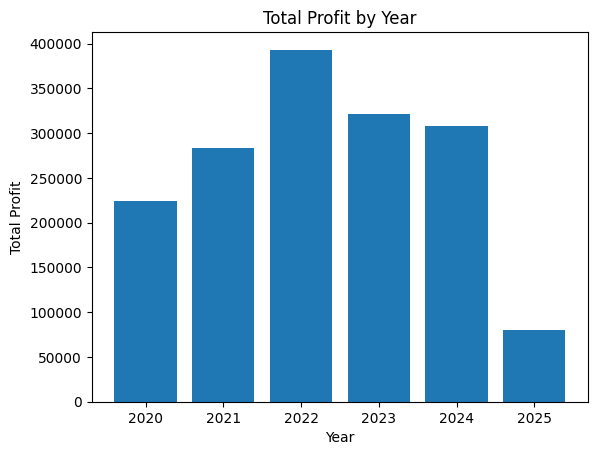

In [10]:
# @title Profit by Year

profit_by_year = data.groupby('Year')['Profit'].sum()

plt.bar(profit_by_year.index, profit_by_year.values)
plt.xlabel('Year')
plt.ylabel('Total Profit')
plt.title('Total Profit by Year')
plt.show()

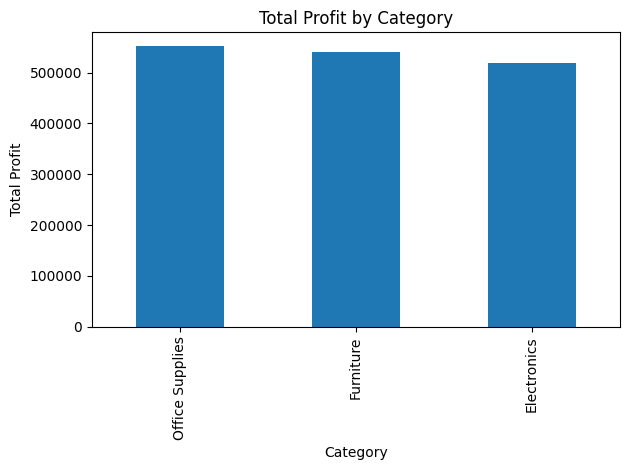

In [11]:
# @title Profit by Category
category_profit = data.groupby('Category')['Profit'].sum().sort_values(ascending=False)

category_profit.plot(kind='bar')
plt.xlabel('Category')
plt.ylabel('Total Profit')
plt.title('Total Profit by Category')

plt.tight_layout() # Adjust layout to prevent labels from overlapping
plt.show()

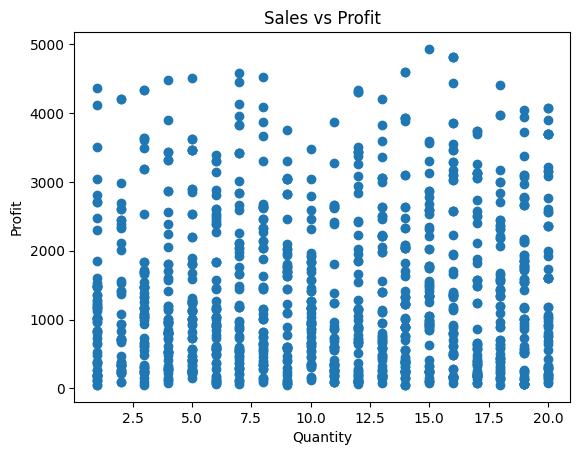

In [12]:
# @title Quantity vs Profit
plt.scatter(data['Quantity'], data['Profit'])
plt.xlabel('Quantity')
plt.ylabel('Profit')
plt.title('Sales vs Profit')
plt.show()

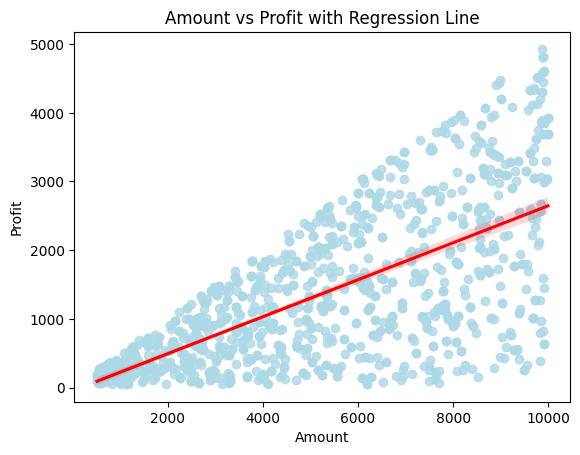

In [20]:
# @title Amount vs Profit
import seaborn as sns

sns.regplot(x='Amount', y='Profit', data=data, color="red", scatter_kws={'color': 'lightblue'})
plt.title('Amount vs Profit with Regression Line')
plt.show()

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from scipy import stats

# Dane
X = data['Amount']
y = data['Profit']


# Dodaj stałą (intercept) do modelu
X_const = sm.add_constant(X)

# Dopasuj model
model = sm.OLS(y, X_const).fit()

# Wydrukuj wyniki
print(model.summary())

# Wyciągnij współczynniki
intercept = model.params['const']
slope = model.params['Amount']
p_value = model.pvalues['Amount']
r_squared = model.rsquared

print(f"Regression Equation: Profit = {intercept:.2f} + {slope:.4f} * Amount")
print(f"p-value: {p_value:.4g}")
print(f"R-squared: {r_squared:.4f}")

                            OLS Regression Results                            
Dep. Variable:                 Profit   R-squared:                       0.456
Model:                            OLS   Adj. R-squared:                  0.456
Method:                 Least Squares   F-statistic:                     999.2
Date:                Mon, 14 Jul 2025   Prob (F-statistic):          8.83e-160
Time:                        07:49:35   Log-Likelihood:                -9711.3
No. Observations:                1194   AIC:                         1.943e+04
Df Residuals:                    1192   BIC:                         1.944e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -44.7259     50.139     -0.892      0.3

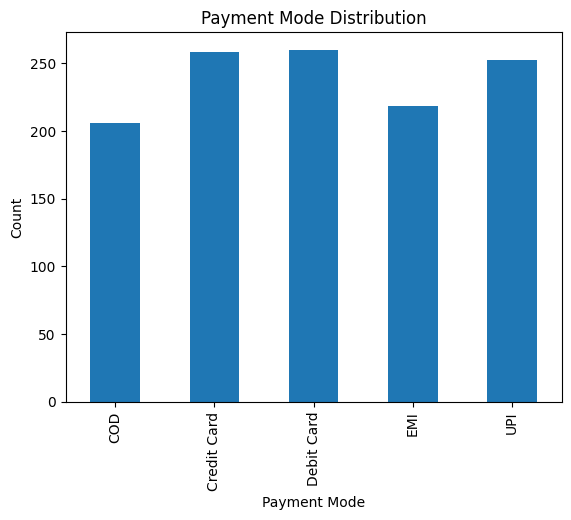

In [14]:
# @title Payment Metod

data.groupby('PaymentMode').size().plot(kind='bar')
plt.xlabel('Payment Mode')
plt.ylabel('Count')
plt.title('Payment Mode Distribution')
plt.show()

([<matplotlib.patches.Wedge at 0x7f6d19b322d0>,
 [Text(0.9111853511437052, 0.6162314953498587, 'New York'),
  Text(-0.20998466426655224, 1.0797714761804293, 'California'),
  Text(-1.057494209540748, 0.3028299800016318, 'Florida'),
  Text(-0.8088832749898184, -0.7454581460026753, 'Texas'),
  Text(0.16149322984252265, -1.0880808502657466, 'Illinois'),
  Text(0.9789218801333719, -0.5017090318064291, 'Ohio')],
 [Text(0.49701019153293, 0.33612627019083197, '18.9%'),
  Text(-0.11453708959993757, 0.5889662597347796, '18.3%'),
  Text(-0.5768150233858624, 0.16517998909179915, '16.8%'),
  Text(-0.4412090590853554, -0.4066135341832774, '15.8%'),
  Text(0.08808721627773962, -0.5934986455994982, '15.2%'),
  Text(0.5339573891636573, -0.2736594718944158, '15.1%')])

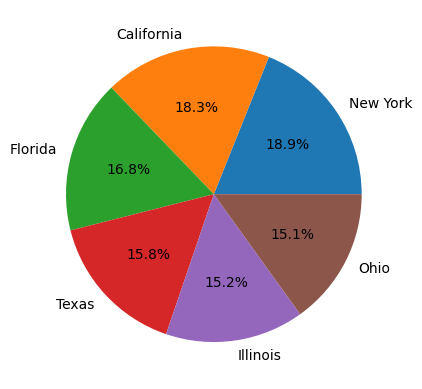

In [15]:
# @title Sales % by State
plt.pie(data['State'].value_counts(), labels=data['State'].value_counts().index, autopct='%1.1f%%')